=================== Processing... AAPL.csv ===================
.\Historical Data\AAPL.csv
Open


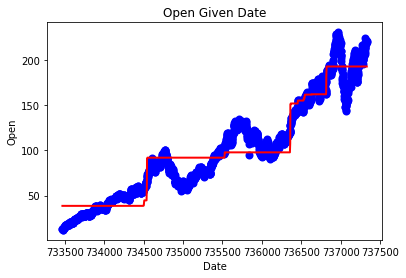

High


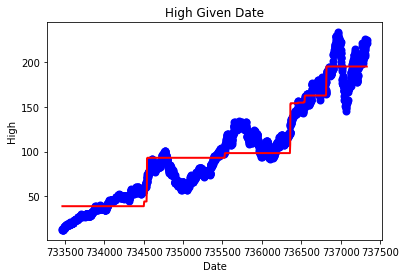

Low


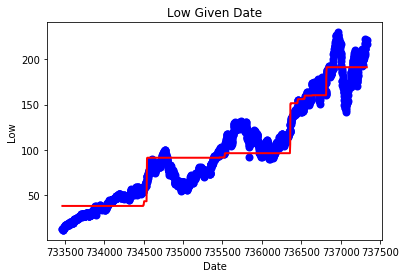

Close


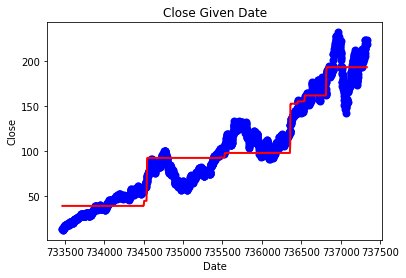

Adj Close


Volume


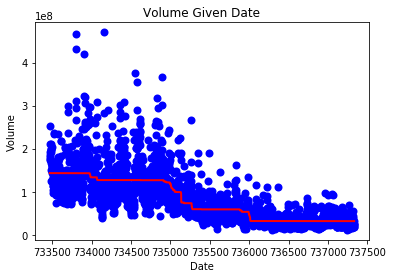

=================== Processing... AMZN.csv ===================
.\Historical Data\AMZN.csv
Open


High


Low


Close


Adj Close


Volume


=================== Processing... GOOG.csv ===================
.\Historical Data\GOOG.csv
Open


High


Low


Close


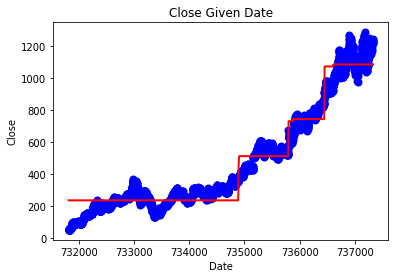

Adj Close


Volume


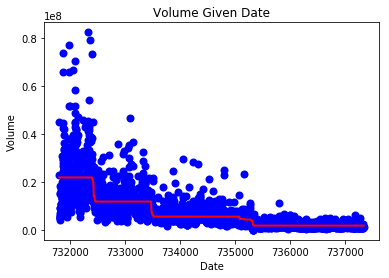

=================== Processing... FB.csv ===================
.\Historical Data\FB.csv
Open


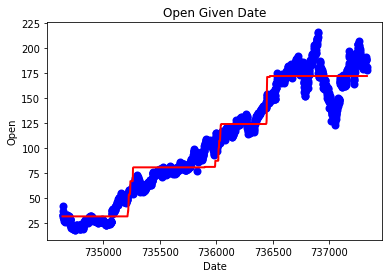

High


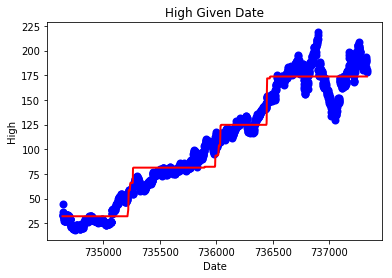

Low


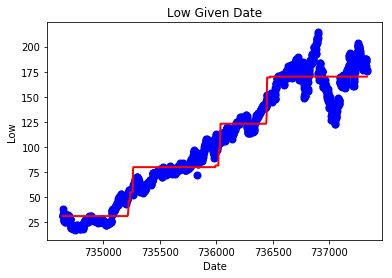

Close


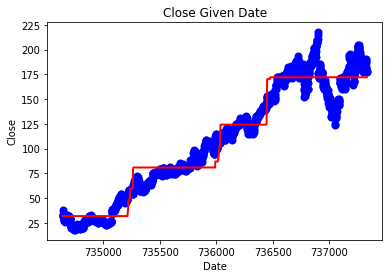

Adj Close


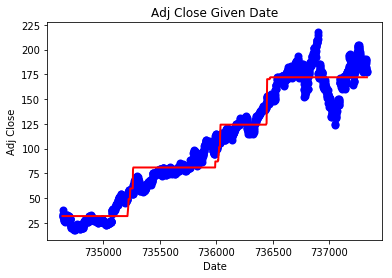

Volume


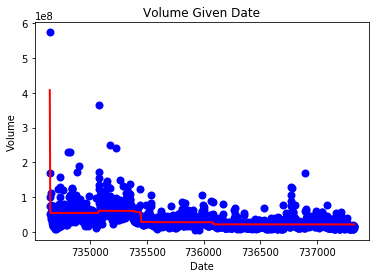

=================== Processing... MSFT.csv ===================
.\Historical Data\MSFT.csv
Open


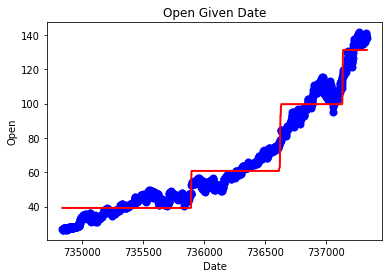

High


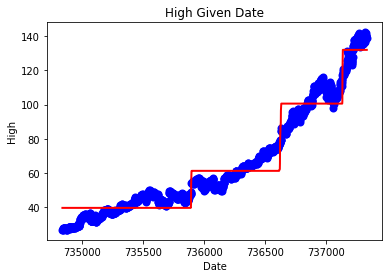

Low


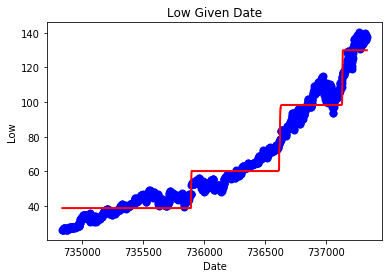

Close


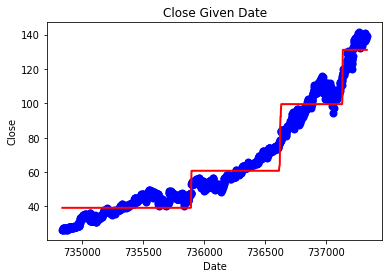

Adj Close


Volume


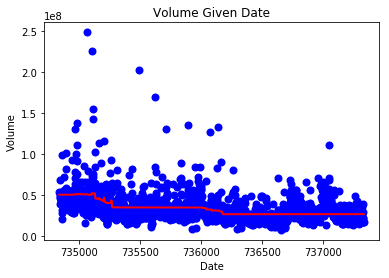

=================== Processing... TSLA.csv ===================
.\Historical Data\TSLA.csv
Open


High


Low


Close


Adj Close


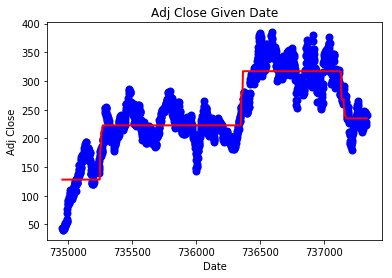

Volume


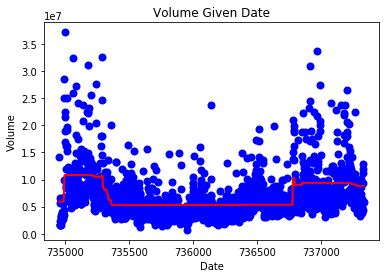

=================== Processing... TWTR.csv ===================
.\Historical Data\TWTR.csv
Open


High


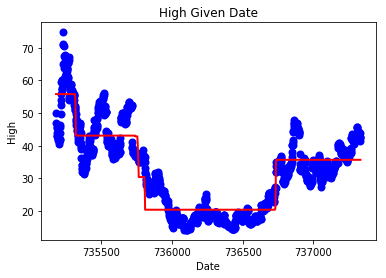

Low


Close


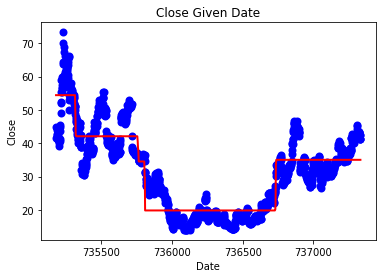

Adj Close


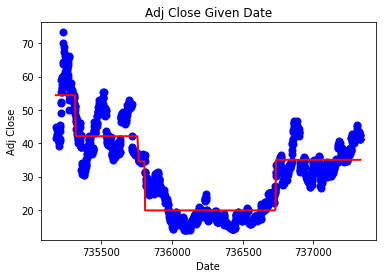

Volume


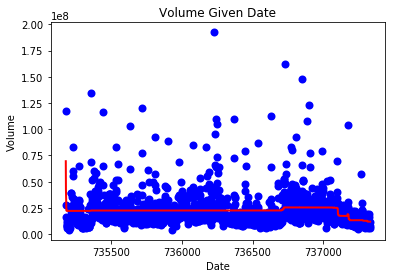

=================== Processing... GE.csv ===================
.\Historical Data\GE.csv
Open


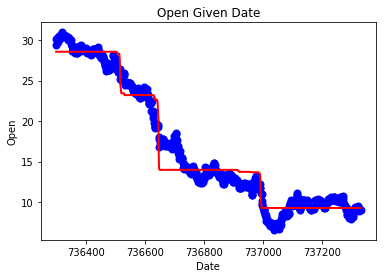

High


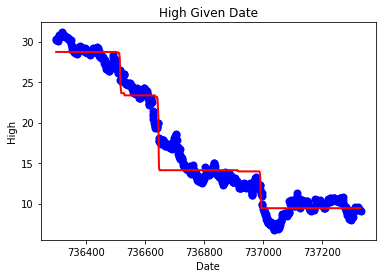

Low


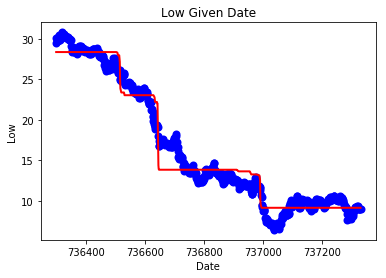

Close


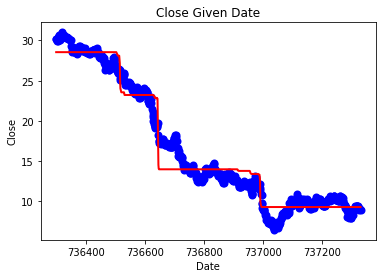

Adj Close


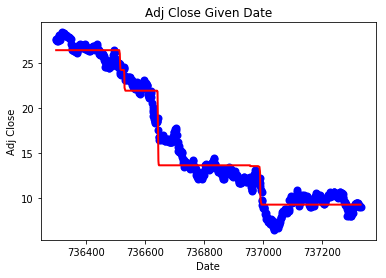

Volume


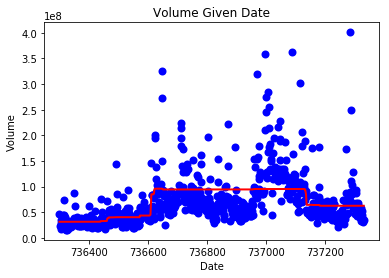

=================== Processing... T.csv ===================
.\Historical Data\T.csv
Open


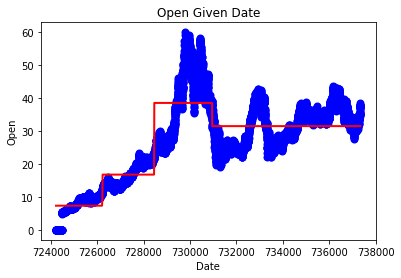

High


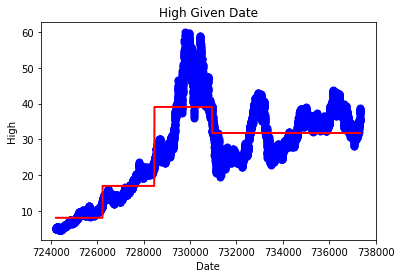

Low


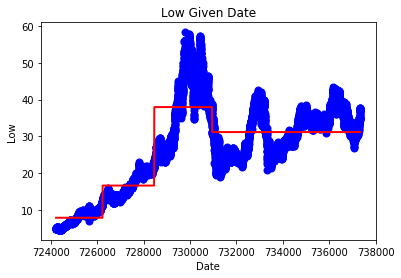

Close


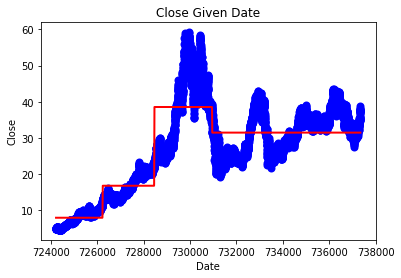

Adj Close


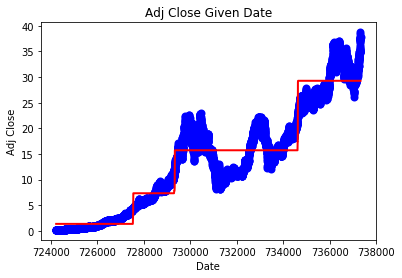

Volume


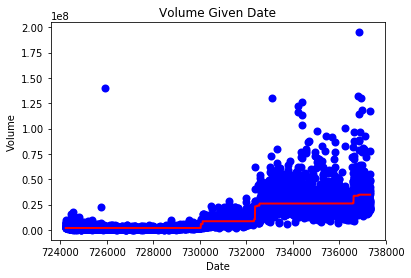

=================== Processing... INTC.csv ===================
.\Historical Data\INTC.csv
Open


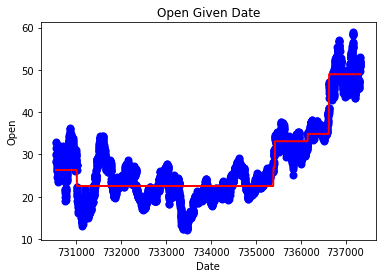

High


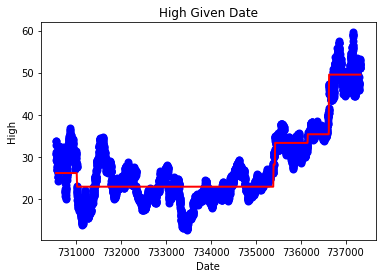

Low


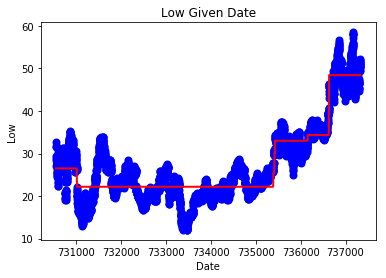

Close


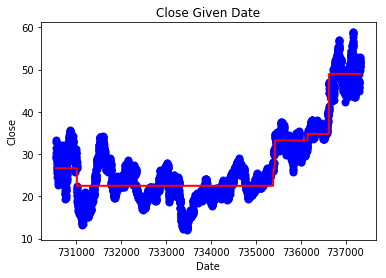

Adj Close


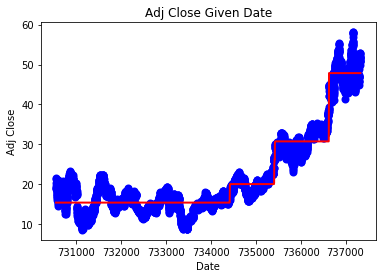

Volume


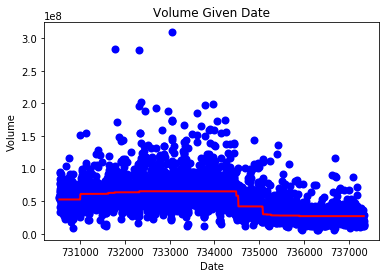

In [11]:
#Sravani Ravula 
#CS483 - Machine Learning
#Project 1
#Radom Forest Regression

#  === Data Set Information
#  === Some Stock Dates Begin on specific dates to eliminate outliers or more closely follow current stock trends.

# Format:  STOCK - Starting Date

	# APPLE     - 2009-03-02
	# AMAZON    - 2014-10-01
	# GOOGLE    - 2004-08-19 (MAX Range)
	# FACEBOOK  - (MAX Range)
	# MICROSOFT - 2012-12-01 
	# TESLA     - 2013-04-01
	# TWITTER   - 2013-07-11 (MAX Range)
	# GE        - 2016-12-01
	# AT&T      - 1983-11-21 (MAX Range)
	# INTEL     - 2001-03-01

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np
import csv
from numpy import array
from sklearn.ensemble import RandomForestRegressor

files = ['AAPL.csv','AMZN.csv','GOOG.csv','FB.csv','MSFT.csv','TSLA.csv','TWTR.csv','GE.csv','T.csv','INTC.csv']
fields = ['Open','High','Low','Close','Adj Close','Volume']

# Loop through each Stock company
for file in files:
    
    predictions = []
    
   # print("=================== Processing... "+file+' ===================')

    # Import historical stock data#
    filepath = '.\\Historical Data\\' + file
    print(filepath)
    DF1 = pd.read_csv(filepath,sep=",")

    # Convert Date to INT value to be usable by library
    DF1['IntDate'] = pd.to_datetime(DF1['Date'])
    DF1['IntDate']= DF1['IntDate'].map(dt.datetime.toordinal)

    # Convert to numpy arrays
    x = DF1['IntDate'].to_numpy()
    # Generate date range for future predictions
    DFP = pd.DataFrame({
        'Date':['2019-10-01','2019-10-02','2019-10-03','2019-10-04','2019-10-05','2019-10-06','2019-10-07',
                '2019-10-08','2019-10-09','2019-10-10','2019-10-11','2019-10-12','2019-10-13','2019-10-14',
                '2019-10-15','2019-10-16','2019-10-17','2019-10-18','2019-10-19','2019-10-20','2019-10-21'],
    })

    # convert to int 
    DFP['IntDate'] = pd.to_datetime(DFP['Date'])
    DFP['IntDate']= DFP['IntDate'].map(dt.datetime.toordinal)
    
    #Loop through each field 
    for i in range(0,6):
        y = DF1[fields[i]].to_numpy()
        
        regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
        x = x.reshape(-1,1)
        
        regr.fit(x,y) #prediction values
        y_pred = regr.predict(x)
        print(fields[i])
        # Plot historical data 
        plt.scatter(x,y,color='blue',linewidth=2)
        plt.plot(x,y_pred,color='red',linewidth=2)
        plt.xlabel('Date')
        plt.ylabel(fields[i])
        plt.title(str(fields[i])+' Given Date')
        plt.show()

        #output prediction data
        
        x2 = DFP['IntDate'].to_numpy()
        x2 = x2.reshape(-1,1)
        regr.fit(x,y)
         # generate prediction set
        predictions.append(linreg.predict(x2))
        
    output = filepath.replace(".csv", "")+"_Output.csv"
    with open(output, 'w') as csvfile: 
        csvwriter = csv.writer(csvfile) 
        csvwriter.writerow(['Date','Open','High','Low','Close','Adj Close','Volume'])
        
        for i in range(0, len(x2)):
            csvwriter.writerow([str(dt.date.fromordinal(x2[i])),str(predictions[0][i]),str(predictions[1][i]),str(predictions[2][i]),str(predictions[3][i]),str(predictions[4][i]),str(predictions[5][i])])
            
            